# Tasks
- Balance the dataset to `average` of majority and minority classes
    - Smote for `Uplsampling`
    - Tomek for `downsampling`
    - `RandomUnderSampling` to decrease more from majority class
- Split the dataset `70-30` ratio
- Null values for both train and test have been replaced with `mean` of train.
- Highest accuracy: `('LightGBM', 0.8620077799767966)`

# Import Libraries

In [1]:
import pandas as pd
import my_packages as mypckg
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv('../data/adult.csv', na_values="?", skipinitialspace=True)

## Categorical Data Encoding

In [3]:
# encode the dataset
df , mappings = mypckg.encoder(df)

In [4]:
mypckg.show(mappings)

{
    "workclass": {
        "Private": 0,
        "Local-gov": 1,
        "Self-emp-not-inc": 2,
        "Federal-gov": 3,
        "State-gov": 4,
        "Self-emp-inc": 5,
        "Without-pay": 6,
        "Never-worked": 7
    },
    "education": {
        "11th": 0,
        "HS-grad": 1,
        "Assoc-acdm": 2,
        "Some-college": 3,
        "10th": 4,
        "Prof-school": 5,
        "7th-8th": 6,
        "Bachelors": 7,
        "Masters": 8,
        "Doctorate": 9,
        "5th-6th": 10,
        "Assoc-voc": 11,
        "9th": 12,
        "12th": 13,
        "1st-4th": 14,
        "Preschool": 15
    },
    "marital-status": {
        "Never-married": 0,
        "Married-civ-spouse": 1,
        "Widowed": 2,
        "Divorced": 3,
        "Separated": 4,
        "Married-spouse-absent": 5,
        "Married-AF-spouse": 6
    },
    "occupation": {
        "Machine-op-inspct": 0,
        "Farming-fishing": 1,
        "Protective-serv": 2,
        "Other-service": 3,
        

## Feature and Target Separation

In [5]:
X = df.drop('income', axis=1)
y = df['income']

In [6]:
print(X)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25        0.0  226802          0                7               0   
1       38        0.0   89814          1                9               1   
2       28        1.0  336951          2               12               1   
3       44        0.0  160323          3               10               1   
4       18        NaN  103497          3               10               0   
...    ...        ...     ...        ...              ...             ...   
48837   27        0.0  257302          2               12               1   
48838   40        0.0  154374          1                9               1   
48839   58        0.0  151910          1                9               2   
48840   22        0.0  201490          1                9               0   
48841   52        5.0  287927          1                9               1   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [7]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


## Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='\n')

(34189, 14)
(34189,)
(14653, 14)
(14653,)


## Finding and Removing Null Values

In [9]:
print(X_train.isnull().sum())

age                   0
workclass          1969
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1977
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      585
dtype: int64


In [10]:
print(X_test.isnull().sum())

age                  0
workclass          830
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         832
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     272
dtype: int64


In [11]:
X_train.fillna(X_train.mean(),inplace=True)
print(X_train.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


In [12]:
X_test.fillna(X_train.mean(), inplace=True)
print(X_test.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


## Allign the y_train and y_test according to the indecies of X_train and X_test

In [13]:
y_train = y_train.loc[X_train.index]
y_test= y_test.loc[X_test.index]

## Balance the Dataset

In [14]:
y_train.describe()

count    34189.000000
mean         0.241803
std          0.428182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [15]:
y_train.shape

(34189,)

In [16]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 34189 entries, 42392 to 15795
Series name: income
Non-Null Count  Dtype
--------------  -----
34189 non-null  int64
dtypes: int64(1)
memory usage: 534.2 KB


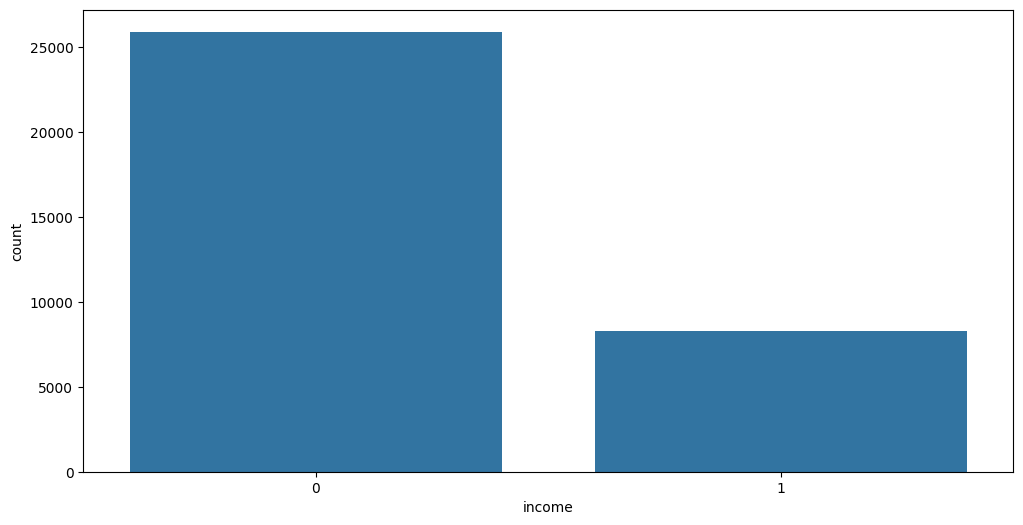

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

In [18]:
y_train.value_counts()

income
0    25922
1     8267
Name: count, dtype: int64

In [19]:
class_counts = Counter(y_train)

average_count = int(sum(class_counts.values()) / len(class_counts))

print(f"The average for classes: {average_count}")

The average for classes: 17094


In [20]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote = SMOTE(sampling_strategy={1: average_count}, random_state=42)
tomek = TomekLinks()

smote_tomek = SMOTETomek(sampling_strategy=1, smote=smote, tomek=tomek, random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

rus = RandomUnderSampler(sampling_strategy={0: average_count})

X_train, y_train = rus.fit_resample(X_train, y_train)

print(f"Y main: {Counter(y_train)}")

Y main: Counter({0: 17094, 1: 17094})


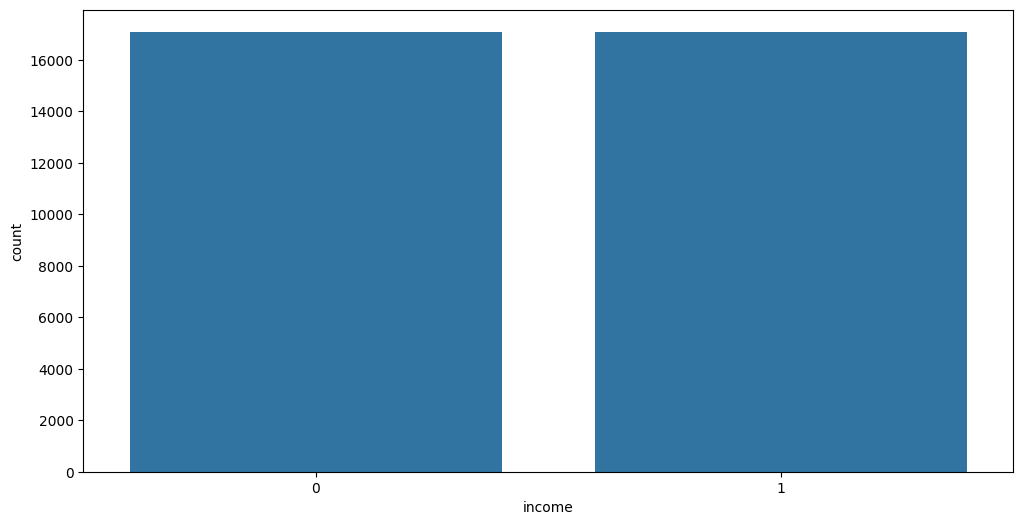

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

# Apply Models

In [22]:
models = mypckg.get_models()
models

{'Logistic Regression': LogisticRegression(max_iter=1000),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Classifier': SVC(),
 'Naive Bayes': GaussianNB(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'LightGBM': LGBMClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None,

In [23]:
accuracies = mypckg.run_the_models(models, X_train, y_train, X_test, y_test)

e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6749471098068655
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     11233
           1       0.39      0.70      0.50      3420

    accuracy                           0.67     14653
   macro avg       0.63      0.68      0.63     14653
weighted avg       0.76      0.67      0.70     14653

Confusion Matrix:
[[7508 3725]
 [1038 2382]]
--------------------------------------------------------------------------------
Accuracy for Logistic Regression: 0.6749471098068655


Model: Decision Tree
Accuracy: 0.7880297549989763
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     11233
           1       0.53      0.70      0.61      3420

    accuracy                           0.79     14653
   macro avg       0.72      0.76      0.73     14653
weighted avg       0.81      0.79      0.80     14653

Confusion Mat

e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.8252235037193749
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     11233
           1       0.59      0.82      0.69      3420

    accuracy                           0.83     14653
   macro avg       0.76      0.82      0.78     14653
weighted avg       0.86      0.83      0.83     14653

Confusion Matrix:
[[9300 1933]
 [ 628 2792]]
--------------------------------------------------------------------------------
Accuracy for AdaBoost: 0.8252235037193749


[LightGBM] [Info] Number of positive: 17094, number of negative: 17094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1734
[LightGBM] [Info] Number of data points in the train set: 34188, number of used features: 14
[LightGBM] 

## Highest Accuracy

In [24]:
mypckg.highest_accuracy(accuracies)

The higest accuracy in this experiment:
LightGBM -->> 0.8620077799767966


('LightGBM', 0.8620077799767966)